In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:
# Load data
df = pd.read_csv('weatherReport.csv')
df.head(10)

,country,location_name,latitude,longitude,last_update_Date,last_updated_time,temperature_celsius,condition_text,wind_kph,pressure_in,precip_in,humidity,cloud
0,Cameroon,Yaounde,3.87,11.52,16-May-24,09:45:00,25.0,Partly Cloudy,3.6,29.94,0.0,78,25
1,Jamaica,Norman Gardens,17.97,-76.75,19-May-24,09:15:00,30.0,Partly Cloudy,3.6,29.94,0.0,66,25
2,Dominica,Roseau,15.30,-61.40,20-May-24,10:45:00,33.0,Partly Cloudy,3.6,29.94,0.0,49,25
3,Austria,Vienna,48.20,16.37,23-May-24,16:00:00,23.0,Partly Cloudy,3.6,29.94,0.0,53,25
4,Armenia,Yerevan,40.18,44.51,27-May-24,18:30:00,27.0,Partly Cloudy,3.6,29.94,0.0,26,25
5,Tajikistan,Dushanbe,38.56,68.77,01-Jun-24,19:30:00,29.0,Partly Cloudy,3.6,29.94,0.0,35,25
6,Iran,Tehran,35.73,51.33,04-Jun-24,17:45:00,31.0,Partly Cloudy,3.6,29.94,0.0,18,25
7,Macedonia,Skopje,42.00,21.43,05-Jun-24,16:15:00,29.0,Partly Cloudy,3.6,29.94,0.0,40,25
8,Netherlands,Amsterdam,52.37,4.89,29-Jun-24,14:45:00,22.3,Partly Cloudy,3.6,29.94,0.0,50,25
9,Vanuatu,Port Vila,-17.73,168.32,05-Jul-24,00:15:00,19.3,Partly Cloudy,3.6,29.94,0.0,100,25


In [5]:
# Summary Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79696 entries, 0 to 79695
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              79696 non-null  object 
 1   location_name        79696 non-null  object 
 2   latitude             79696 non-null  float64
 3   longitude            79696 non-null  float64
 4   last_update_Date     79696 non-null  object 
 5   last_updated_time    79696 non-null  object 
 6   temperature_celsius  79696 non-null  float64
 7   condition_text       79696 non-null  object 
 8   wind_kph             79696 non-null  float64
 9   pressure_in          79696 non-null  float64
 10  precip_in            79696 non-null  float64
 11  humidity             79696 non-null  int64  
 12  cloud                79696 non-null  int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 7.9+ MB


In [6]:
# Statistical Summary
display(df.describe())

,latitude,longitude,temperature_celsius,wind_kph,pressure_in,precip_in,humidity,cloud
count,79696.000000,79696.000000,79696.000000,79696.000000,79696.000000,79696.000000,79696.000000,79696.000000
mean,19.128875,22.182379,22.407806,13.365501,29.944057,0.005272,63.593355,39.605890
std,24.472618,65.827696,9.240102,13.531551,0.359380,0.023461,24.322302,33.841267
min,-41.300000,-175.200000,-24.900000,3.600000,27.960000,0.000000,2.000000,0.000000
25%,3.750000,-6.836100,17.200000,6.500000,29.830000,0.000000,46.000000,2.000000
50%,17.250000,23.316700,24.800000,11.200000,29.920000,0.000000,69.000000,29.000000
75%,40.400000,50.580000,28.300000,18.400000,30.050000,0.000000,83.000000,75.000000
max,64.150000,179.220000,49.200000,2963.200000,88.770000,1.660000,100.000000,100.000000


In [7]:
# Select environmental features
features = ['temperature_celsius', 'humidity', 'pressure_in', 'precip_in']
data = df[features].dropna()

In [8]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) 

In [9]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [10]:
df['Anomaly'] = df['pressure_in'].apply(lambda x: 'Yes' if x < 28.5 or x > 30.7 else 'No')

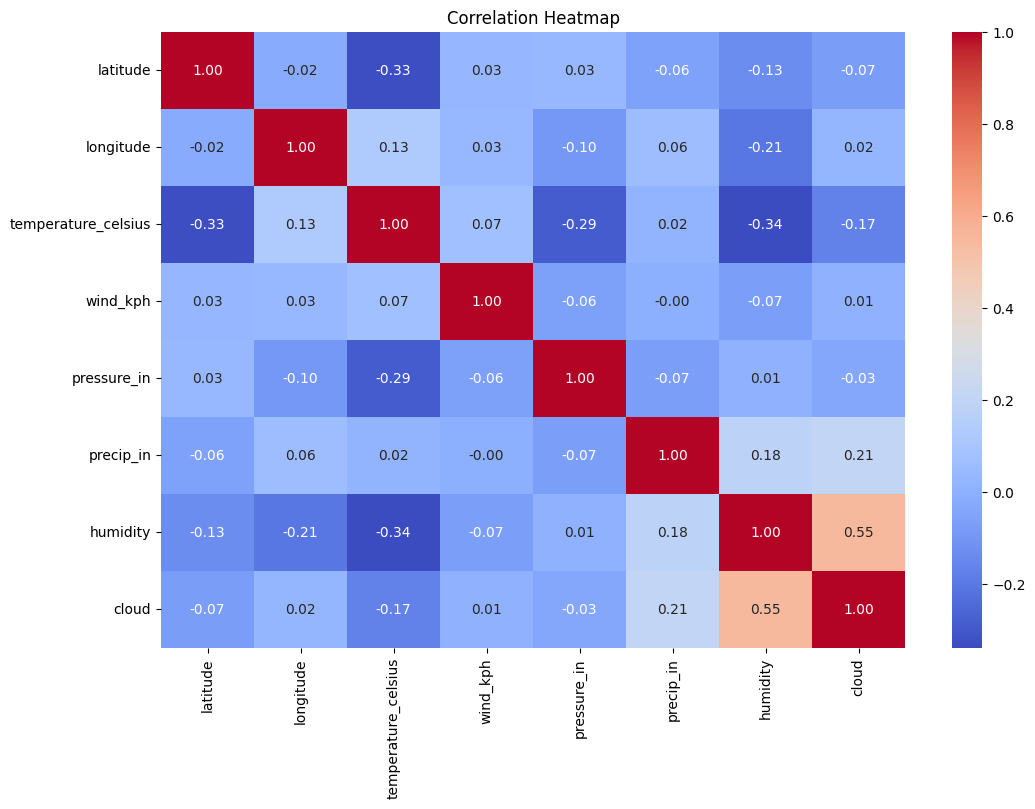

In [13]:
# Correlation Matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


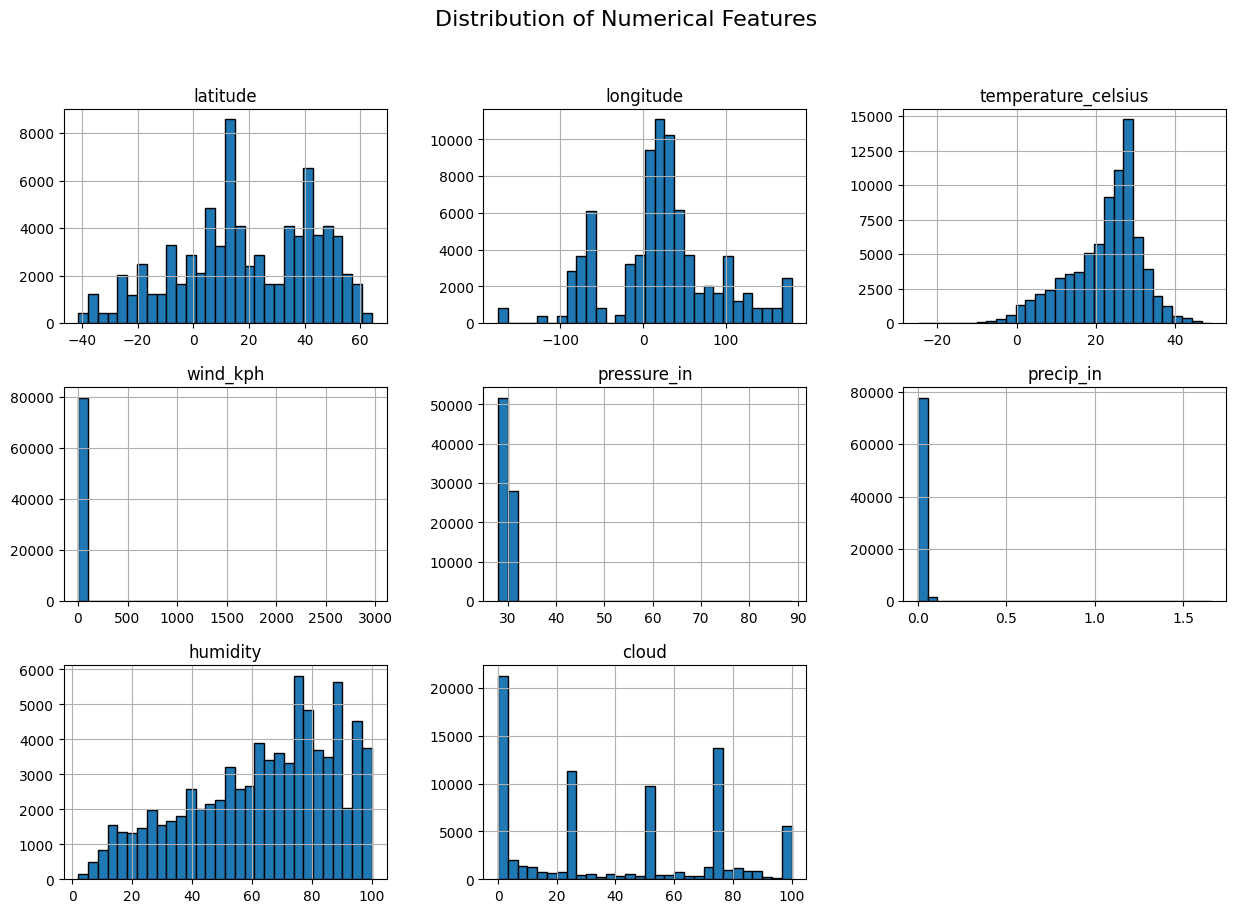

In [14]:
# Distribution of Features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

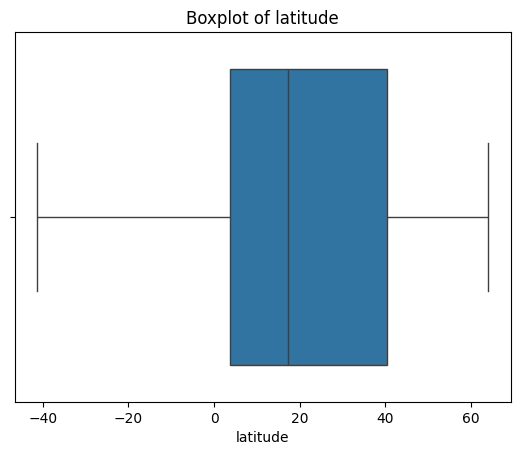

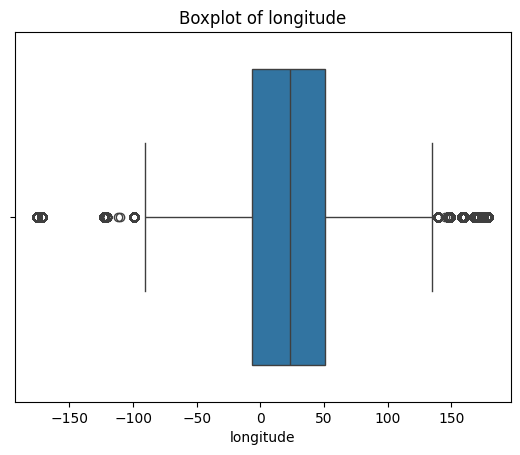

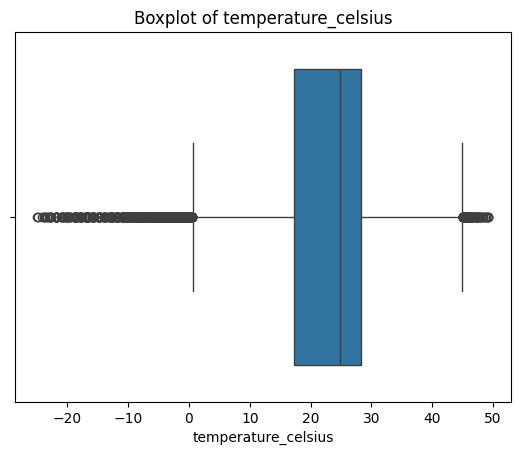

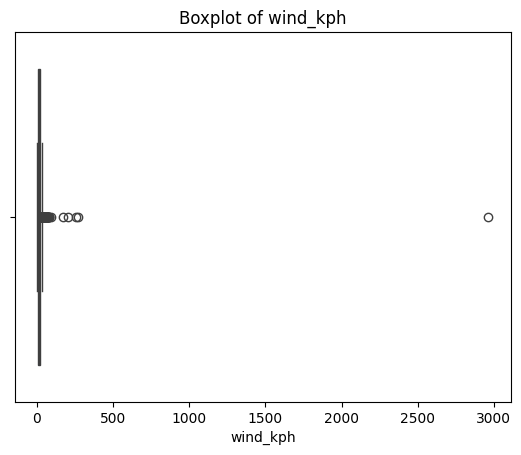

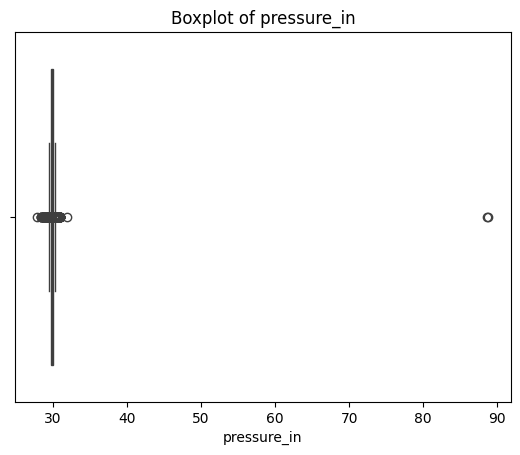

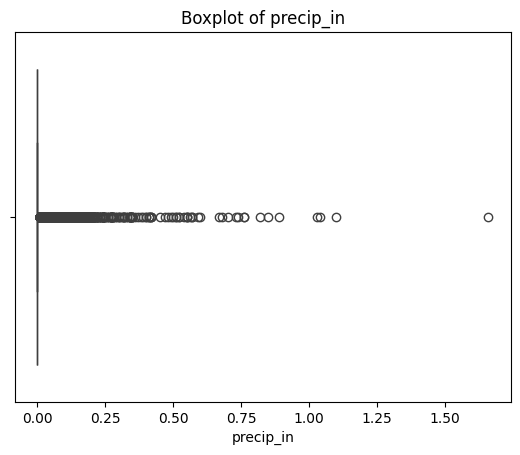

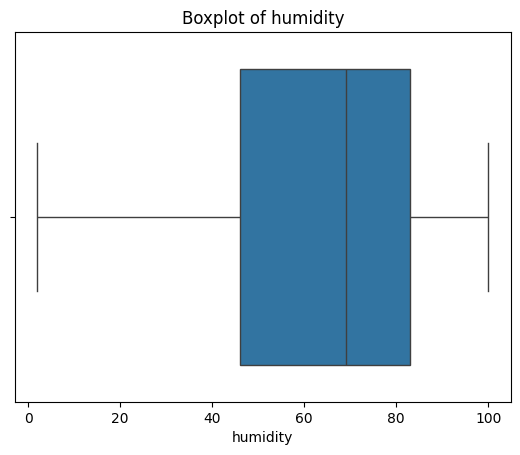

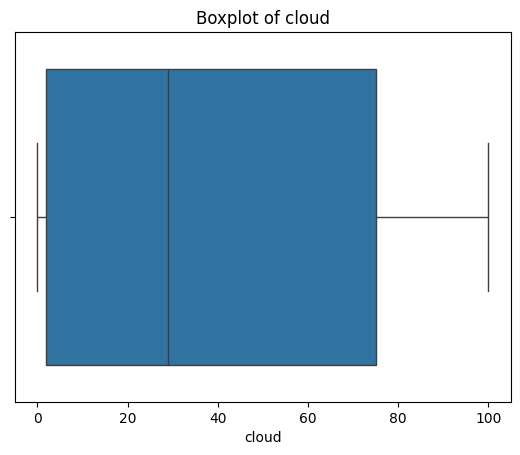

In [15]:
# Boxplots for Outlier Detection
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

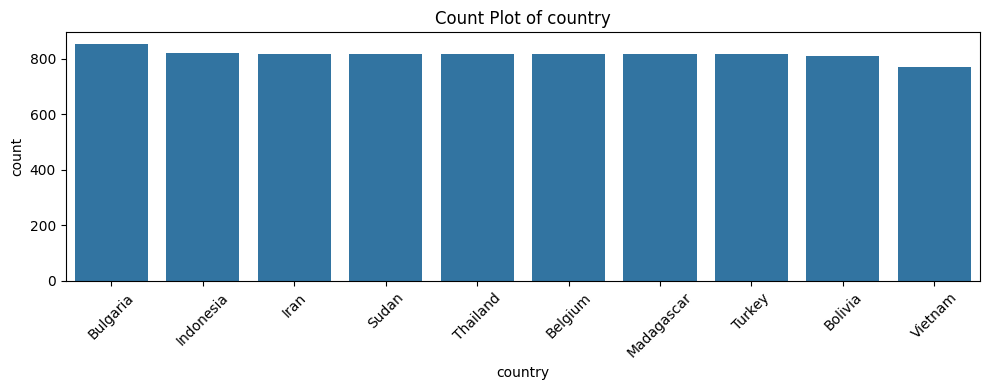

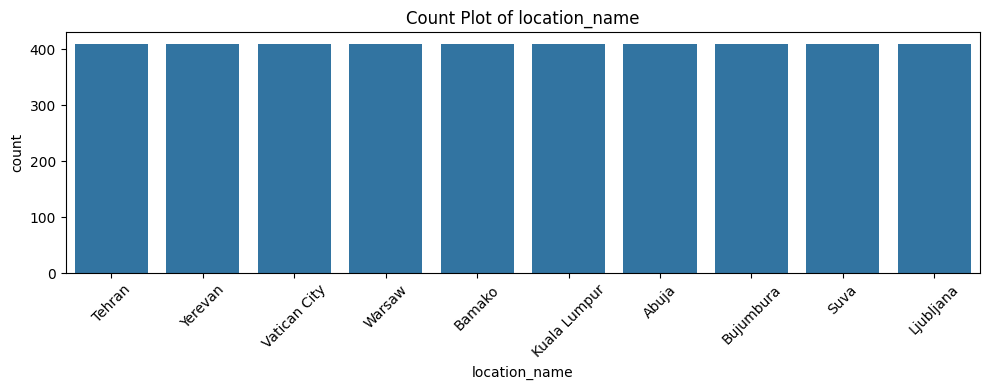

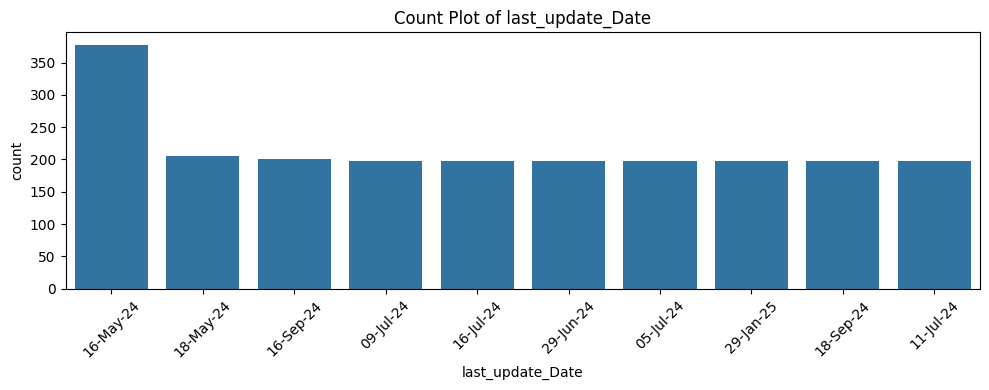

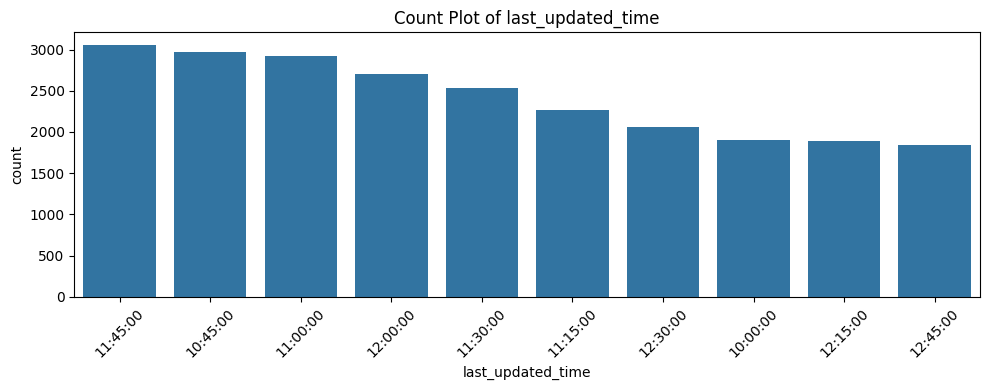

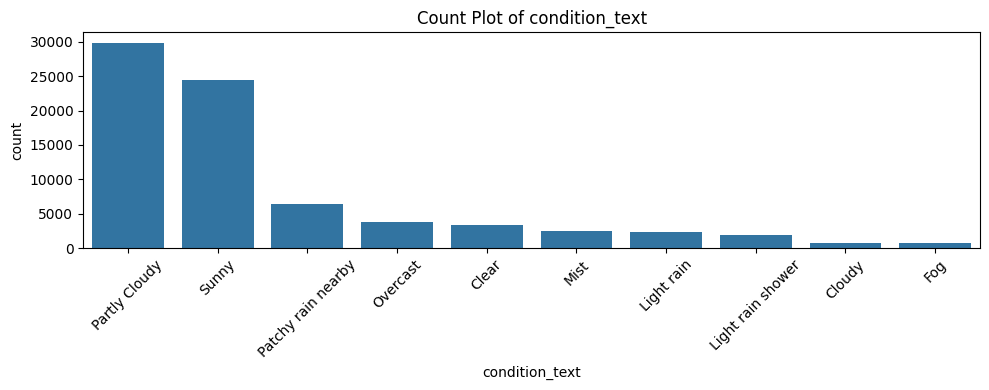

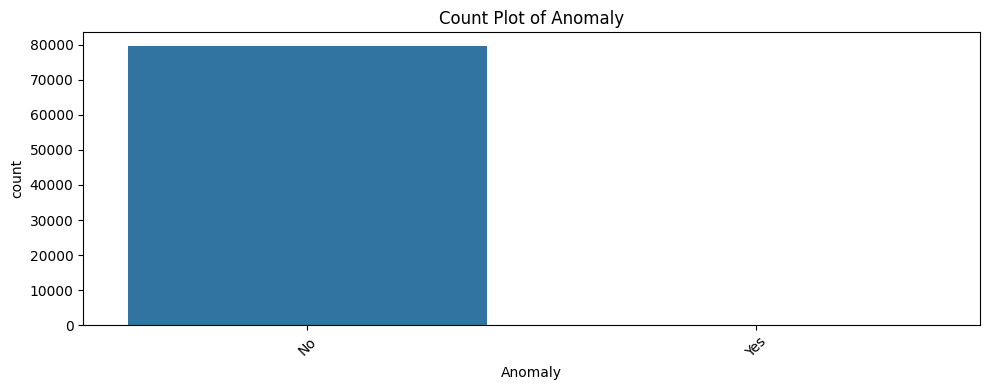

In [16]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

In [17]:
df.to_csv("ClusteredWeatherData.csv", index=False)